In [1]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np

def gaussian_noise(image, mean=0, sigma=25):
    row, col = image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy = np.clip(image + gauss, 0, 255)
    return noisy.astype(np.uint8)
    
def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

# Filtering

Image filtering refers to the process of modifying or enhancing an image by applying a filter, which is essentially a mathematical operation or algorithm that transforms the pixel values of the image. Filters are typically applied to achieve various effects such as blurring, sharpening, edge detection, noise reduction, and color enhancement.

(Text(0.5, 1.0, 'Filtered image'), (-0.5, 639.5, 479.5, -0.5))

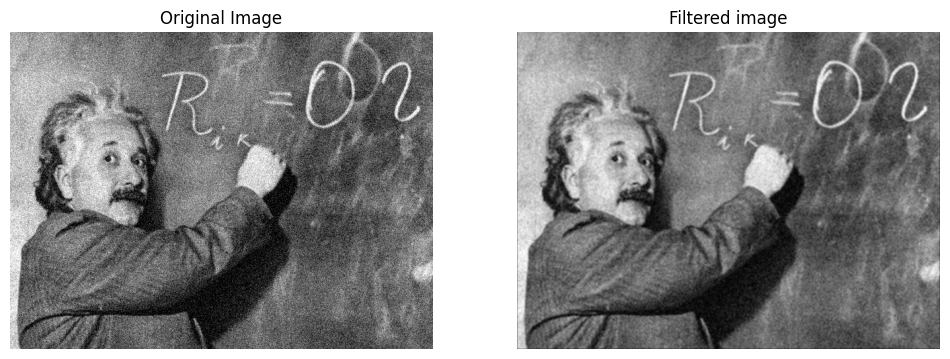

In [3]:
# Read the image
image = cv2.imread('data/images/einstein.jpg', cv2.IMREAD_GRAYSCALE)
#image = gaussian_noise(image, mean = 5, sigma=25) # adding noise

# Define a 3x3 filter or kernel 
f1 = 1/9 * np.array([[1,1,1],
                     [1,1,1],
                     [1,1,1]])
f2 = np.array([[0,0,0],
                     [0,0,1,],
                     [0,0,0]])
f3 = np.array([[0,0,0],
                     [1,0,0,],
                     [0,0,0]])


# Apply the kernel using convolution
#output = np.zeros(image.shape, dtype = np.float32)
output = cv2.filter2D(src=image, ddepth=cv2.CV_32F, kernel=f1, borderType=cv2.BORDER_CONSTANT)

# Display the original and filtered image
plt.figure(figsize=(12,10))

plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(122)
plt.imshow(output, cmap = 'gray')
plt.title('Filtered image'), plt.axis('off')


## Box and Gaussian filter

(-0.5, 99.5, 99.5, -0.5)

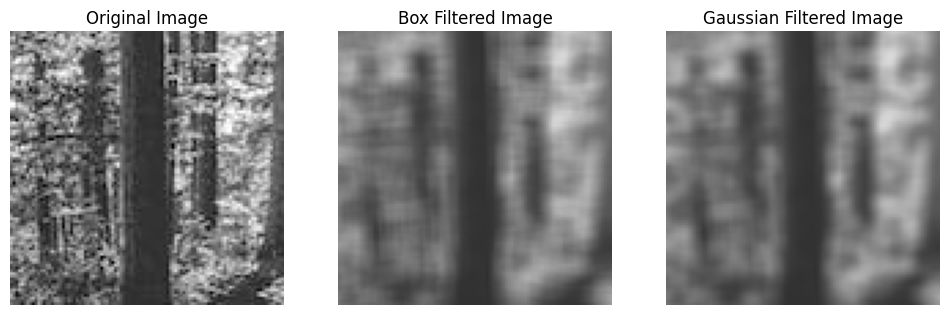

In [6]:
# Read the image
image = cv2.imread('data/images/trees.jpg', cv2.IMREAD_GRAYSCALE)
#image = gaussian_noise(image, sigma=55)

# Apply the box filter
box_filtered_image = cv2.boxFilter(image, -1, ksize=(7,7), borderType=cv2.BORDER_CONSTANT)
gaussian_filtered_image = cv2.GaussianBlur(image, ksize=(7,7), sigmaX = 3, sigmaY = 3, borderType=cv2.BORDER_CONSTANT)

# Display the original and smooth filter
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image[200:300,200:300], cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(box_filtered_image[200:300,200:300], cv2.COLOR_BGR2RGB))
plt.title('Box Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(gaussian_filtered_image[200:300,200:300], cv2.COLOR_BGR2RGB))
plt.title('Gaussian Filtered Image')
plt.axis('off')


## Median Filter

(-0.5, 511.5, 511.5, -0.5)

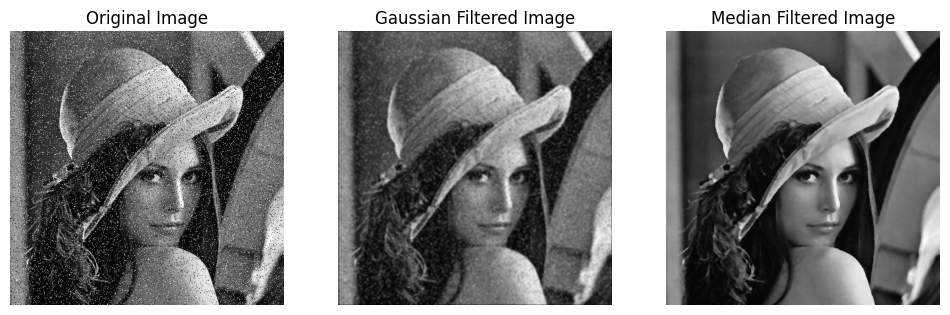

In [23]:
# Read the image
image = cv2.imread('data/images/lena.png', cv2.IMREAD_GRAYSCALE)
image = sp_noise(image, .1)
# Define the size of the box filter kernel (e.g., 3x3)
kernel_size = (6, 6)

# Apply the box filter
gaussian_filtered_image = cv2.GaussianBlur(image, ksize=(5,5), sigmaX = 2, sigmaY = 2, borderType=cv2.BORDER_CONSTANT)
median_filtered_image = cv2.medianBlur(image, ksize=5)

# Display the original and smooth filter
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(gaussian_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Median Filtered Image')
plt.axis('off')

